Импортируем все нужные пакеты

In [139]:
from sklearn.datasets import load_diabetes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Загружу датасет sklearn.datasets.load_diabetes() и посмотрю, что в нем есть

In [140]:
data = load_diabetes()

df=pd.DataFrame(data=np.c_[data['data'],data['target']],columns=data['feature_names']+['target'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Датасет load_diabetes из библиотеки sklearn содержит информацию о 442 пациентах с диабетом. По умолчанию возвращает значения уже масштабированные (переменные объекта центрируются по среднему значению и масштабируются на стандартное отклонение, умноженное на квадратный корень из n_samples), если задать scaled = False, то вернутся не масштабированные значения. Всего в датасете 10 признаков:

1. age (возраст пациента)
2. sex (пол пациента)
3. body mass i, в датасете столбец bmindex (индекс массы тела)
4. average blood pre, в датасете столбец bpssure (среднее артериальное давление)
5. s1, s2, s3, s4, s5различныеричные измличных химических показателей в 
6. рови)

Целевая переменная в этом датасете - quantitive measure of disease progression (количественная мера прогрессирования заболевания), которая представляет собой числовую оценку прогрессирования заболевания диабета через год после началдования.а иссле Для удобства переименовываю ее вдования.

Использую метод понижения размерности LDA для снижения количества признаков до одного.

In [141]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(data.data, data.target)
Y = data.target

Далее реализую алгоритм линейной регрессии с использованием градиентного спуска и функцией потерь Smse. Продифференцирована она была в условии к заданию.

In [142]:
def gradient_descent_with_MSE(X, Y, algorithm_step=0.01, num_iterations=1000):
    """
    Градиентный спуск с помощью функции потерь Smse
    :param X: признак
    :param Y: целевая переменная
    :param algorithm_step:шаг алгоритма
    :param num_iterations: количество итераций
    :return: прогноз
    """
    n = len(Y)
    a_b = np.ones(2)
    dif = np.ones(2)
    for iteration in range(num_iterations):
        predictions = np.multiply(X, a_b)
        errors = Y - predictions[:, 0] - predictions[:, 1]
        dif[0] = (-2 / n) * np.dot(X[:, 0], errors)

        dif[1] = (-2 / n) * np.sum(errors)

        a_b -= algorithm_step * dif
    answer = np.ones(n)
    for i in range(n):
        answer[i] = X[i, 0]*a_b[0] + a_b[1]

    return answer

Также реализую алгоритм линейной регрессии с использованием градиентного спуска и функцией потерь Smae. Продифференцировав, получу соотношения для реализации алгоритма (дифференцирование и упрощение для реализации можно посмотреть в файле dif.jpg в репозитории. Там I отмечено выражение под суммой и показано как можно оптимизировать, чтобы не делать сложных вычислений. Надеюсь будет понятно)

In [143]:
def gradient_descent_with_MAE(X, Y, algorithm_step=0.01, num_iterations=10**5):
    """
    Градиентный спуск с помощью функции потерь Smse
    :param X: признак
    :param Y: целевая переменная
    :param algorithm_step:шаг алгоритма
    :param num_iterations: количество итераций
    :return: прогноз
    """
    n = len(Y)
    a_b = np.ones(2)
    dif = np.ones(2)
    for iteration in range(num_iterations):
        predictions = np.multiply(X, a_b)
        errors = Y - predictions[:, 0] - predictions[:, 1]
        difa = 0
        difb = 0
        for i in range(n):
            if errors[i]>0:
                difa += -X[i, 0]
                difb += -1
            else:
                difa += X[i, 0]
                difb += 1 
        dif[0] = difa/n
        dif[1] = difb/n
        a_b -= algorithm_step * dif
    answer = np.ones(n)
    for i in range(n):
        answer[i] = X[i, 0]*a_b[0] + a_b[1]

    return answer

Прогоним данные из датасета на собственных алгоритмах, чтобы в дальнейшем посмотреть разницу с алгоритмом библиотеки sklearn.
    Также преобразую X в матрицу под коэффициенты a и b (первый столбец под a, второй под b). Сначала построю прогноз с помощью линейной регрессии с функцией потерь Smse

In [144]:
X = np.c_[X_lda, np.ones((len(X_lda), 1))]
predictions_our_mse = gradient_descent_with_MSE(X, Y)

Теперь посторою прогноз с помощью линейной регрессии с функцией потерь Smae

In [145]:
predictions_our_mae = gradient_descent_with_MAE(X, Y)

Теперь построю прогнозы на тех же данных, , используя стандартную реализацию LinearRegression 
из sklearn

In [146]:
linearregression_sklearn = LinearRegression()
linearregression_sklearn.fit(X_lda, Y)
predictions_sklearn = linearregression_sklearn.predict(X_lda)

Сравню основные метрики качества для "собственной"реализации c Smse и варианта из sklearn – MSE, MSLE, MAE, R2, RMSE.

In [147]:
mse_my = mean_squared_error(Y, predictions_our_mse)
msle_my = mean_squared_log_error(Y, predictions_our_mse)
mae_my = mean_absolute_error(Y, predictions_our_mse)
r2_my = r2_score(Y, predictions_our_mse)
rmse_my = np.sqrt(mse_my)

mse_sklearn = mean_squared_error(Y, predictions_sklearn)
msle_sklearn = mean_squared_log_error(Y, predictions_sklearn)
mae_sklearn = mean_absolute_error(Y, predictions_sklearn)
r2_sklearn = r2_score(Y, predictions_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)


print("Собственная реализация:\t\t\tРеализация из sklearn:\t\t\tРазница в точности:")
indent = "\t\t\t\t"
print("MSE:", round(mse_my, 3), indent, round(mse_sklearn, 3), indent, round(mse_my, 3) - round(mse_sklearn, 3))
print("MSLE:", round(msle_my, 3), indent, round(msle_sklearn, 3), indent, "\t", round(msle_my, 3) - round(msle_sklearn, 3))
print("MAE:", round(mae_my, 3), indent, round(mae_sklearn, 3), indent, round(mae_my, 3) - round(mae_sklearn, 3))
print("R2:", round(r2_my, 3), indent, round(r2_sklearn, 3),  indent, "\t", round(r2_my, 3) - round(r2_sklearn, 3))
print("RMSE:", round(rmse_my, 3), indent, round(rmse_sklearn, 3), indent, round(rmse_my, 3) - round(rmse_sklearn, 3))

Собственная реализация:			Реализация из sklearn:			Разница в точности:
MSE: 2962.904 				 2962.904 				 0.0
MSLE: 0.175 				 0.175 				 	 0.0
MAE: 43.755 				 43.755 				 0.0
R2: 0.5 				 0.5 				 	 0.0
RMSE: 54.433 				 54.433 				 0.0


Как можно видеть, собственная реализация и реализация sklearn никак не отличаются в точности реализации, что говорит о правильном написание алгоритма.

Теперь также сравню основные метрики качества для "собственной"реализации c Smae и варианта из sklearn – MSE, MSLE, MAE, R2, RMSE.

In [148]:
mse_my = mean_squared_error(Y, predictions_our_mae)
msle_my = mean_squared_log_error(Y, predictions_our_mae)
mae_my = mean_absolute_error(Y, predictions_our_mae)
r2_my = r2_score(Y, predictions_our_mae)
rmse_my = np.sqrt(mse_my)

mse_sklearn = mean_squared_error(Y, predictions_sklearn)
msle_sklearn = mean_squared_log_error(Y, predictions_sklearn)
mae_sklearn = mean_absolute_error(Y, predictions_sklearn)
r2_sklearn = r2_score(Y, predictions_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)


print("Собственная реализация:\t\t\tРеализация из sklearn:\t\t\tРазница в точности:")
indent = "\t\t\t\t"
print("MSE:", round(mse_my, 3), indent, round(mse_sklearn, 3), indent, round(mse_my, 3) - round(mse_sklearn, 3))
print("MSLE:", round(msle_my, 3), indent, round(msle_sklearn, 3), indent, "\t", round(msle_my, 3) - round(msle_sklearn, 3))
print("MAE:", round(mae_my, 3), indent, round(mae_sklearn, 3), indent, round(mae_my, 3) - round(mae_sklearn, 3))
print("R2:", round(r2_my, 3), indent, round(r2_sklearn, 3),  indent, "\t", round(r2_my, 3) - round(r2_sklearn, 3))
print("RMSE:", round(rmse_my, 3), indent, round(rmse_sklearn, 3), indent, round(rmse_my, 3) - round(rmse_sklearn, 3))

Собственная реализация:			Реализация из sklearn:			Разница в точности:
MSE: 2969.807 				 2962.904 				 6.902999999999793
MSLE: 0.174 				 0.175 				 	 -0.0010000000000000009
MAE: 43.733 				 43.755 				 -0.02200000000000557
R2: 0.499 				 0.5 				 	 -0.0010000000000000009
RMSE: 54.496 				 54.433 				 0.06300000000000239


Реализация линейной регрессии с функцией потерь Smae немного хуже собственной реализации с функцией потерь Smse и реализации sklearn. Но стоит отметить, что при одинаковом шаге алгоритма данная реализация требует в 100 раз больше итераций, чтобы достичь приблизительно такой же точности (что явно не является ее плюсом).

Таким образом, наиболее эффективными оказились собственный алгоритм с функцией потерь Smse и реализация sklearn. На вопрос какой из них наименее подвержен обучению, могу предположить, что это алгоритм из библиотеки sklearn.

Визуализирую на плоскости свои реализации и реализацию sklearn

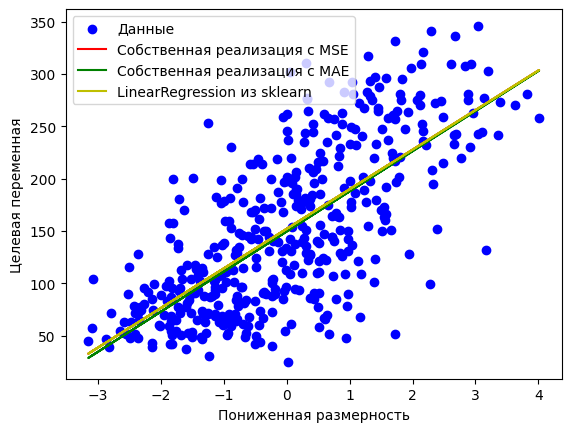

In [149]:
plt.scatter(X_lda, Y, color='b', label='Данные')
plt.plot(X_lda, predictions_our_mse, color='r', label='Собственная реализация c MSE')
plt.plot(X_lda, predictions_our_mae, color='g', label='Собственная реализация c MAE')
plt.plot(X_lda, predictions_sklearn, color='y', label='LinearRegression из sklearn')
plt.xlabel('Пониженная размерность')
plt.ylabel('Целевая переменная')
plt.legend()
plt.show()

Как видно из визуализации на плоскости, графики прямых (регрессий) собственной реализации с функцией ошибок Smse и реализации sklearn уложились в одну прямую (поэтому одну из них и не видно). График прямой с собственной реализацией с функцией ошибок Smae находится очень близко к двум остальным реализациям, что не удивительно, так как матрики качества отличаются совсем незначительно.

Вывод: в ходе домашнего задания был рассмотрен алгоритм линейной регрессии с использованием градиентного спуска и различных функций потерь. "Вручную" были реализованы алгоритмы с функциями потерь Smae и Smse, рассмотрен алгоритм LinearRegression из библиотеки sklearn и проведено их сравнение через различные метрики качества. Стоит отметить, что собственные реализации по качеству работы не уступают реализации библиотеки sklearn. Также в конце проведено визульное сравнение алгоритмов, которое также подтверждает примерно одинаковый результат работы алгоритмов.